# Начинаем с просмотра данных в задании

In [60]:
# Изучение данных
import pandas as pd
import seaborn as sns

# Инструменты
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import ADASYN
from collections import Counter

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('train_AIC.csv')
data.head()

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,...,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
0,606,7448,4,5,1,1,9,1,1,150,...,11.0,82.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
1,7,27439,1,1,21,15,255,12,3,12,...,11.0,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,318,27213,1,20,11,12,4,1,1,11,...,12.0,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
3,1768,19949,5,2,1,1,55,1,1,34,...,14.0,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
4,7,27439,1,1,12,9,8,1,3,12,...,7.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


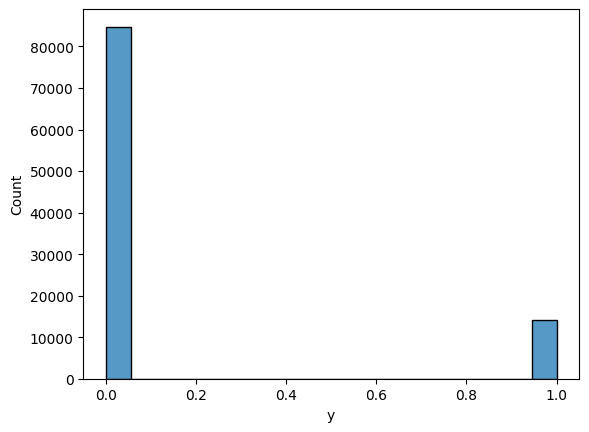

In [4]:
sns.histplot(data['y']);

Нам нужно применить `shuffle`, т.к. очень сильно разнится кол-во значений

## Слишком много columns, наверное многие из них - лишние

In [5]:
len(data.columns)

44

In [6]:
data.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'До поставки', 'Месяц1',
       'Месяц2', 'Месяц3', 'День недели 2', 'Сумма', 'Количество позиций',
       'Количество', 'Количество обработчиков 7', 'Количество обработчиков 15',
       'Количество обработчиков 30', 'Согласование заказа 1',
       'Согласование заказа 2', 'Согласование заказа 3',
       'Изменение даты поставки 7', 'Изменение даты поставки 15',
       'Изменение даты поставки 30',
       'Отмена полного деблокирования заказа на закупку',
       'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
       'Изменение позиции заказа на закупку: дата поставки',
       'Количество циклов согласования',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 1_2', 'Дней между 2_3'

## Корреляция между факторами и 'y'

In [7]:
data.corr()['y']

Поставщик                                                                 0.058569
Материал                                                                  0.047861
Категорийный менеджер                                                    -0.001642
Операционный менеджер                                                    -0.034853
Завод                                                                     0.064713
Закупочная организация                                                    0.083670
Группа закупок                                                            0.034980
Балансовая единица                                                        0.063356
ЕИ                                                                        0.062017
Группа материалов                                                         0.035087
Вариант поставки                                                          0.049952
НРП                                                                       0.022316
Длит

In [8]:
mean_corr = data.corr()['y'].mean()
mean_corr

0.03975766901347147

In [9]:
corr = data.corr()['y']
corr = corr[(corr >= mean_corr) | (corr <= -mean_corr)]
corr

Поставщик                     0.058569
Материал                      0.047861
Завод                         0.064713
Закупочная организация        0.083670
Балансовая единица            0.063356
ЕИ                            0.062017
Вариант поставки              0.049952
Длительность                 -0.092746
Месяц2                       -0.047557
Сумма                         0.112709
Количество обработчиков 7     0.112927
Количество обработчиков 15    0.113120
Количество обработчиков 30    0.113525
y                             1.000000
Name: y, dtype: float64

## Снизу находятся корреляции, которые нас интересуют, так как они по значению больше *(или меньше)*, чем среднее между всеми корреляцифями факторов

In [10]:
corr[:len(corr)-1]

Поставщик                     0.058569
Материал                      0.047861
Завод                         0.064713
Закупочная организация        0.083670
Балансовая единица            0.063356
ЕИ                            0.062017
Вариант поставки              0.049952
Длительность                 -0.092746
Месяц2                       -0.047557
Сумма                         0.112709
Количество обработчиков 7     0.112927
Количество обработчиков 15    0.113120
Количество обработчиков 30    0.113525
Name: y, dtype: float64

In [11]:
corr[:len(corr)-1].max()

0.11352488772019019

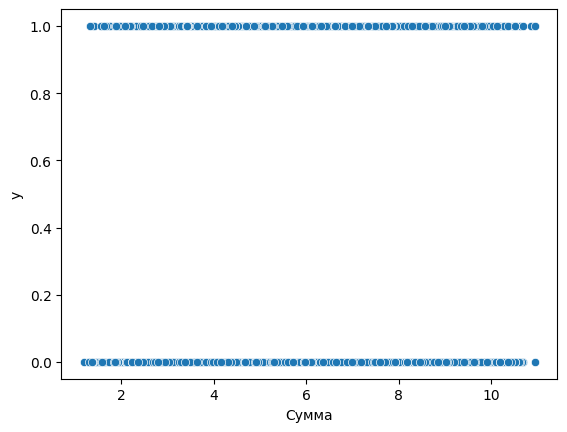

In [12]:
sns.scatterplot(data=data, x='Сумма', y='y');

In [13]:
corr.index

Index(['Поставщик', 'Материал', 'Завод', 'Закупочная организация',
       'Балансовая единица', 'ЕИ', 'Вариант поставки', 'Длительность',
       'Месяц2', 'Сумма', 'Количество обработчиков 7',
       'Количество обработчиков 15', 'Количество обработчиков 30', 'y'],
      dtype='object')

In [14]:
len(corr.index)

14

## Снизу - датафрейм, с которым мы будем работать далее. Что с ним можно сделать?

___

- Во-первых, нам следует убрать `NaN` значения, скорее всего вставляя средние *(или максимально-частоповторяющиеся)* значения, чтобы не похерить точность модели

- Во-вторых, т.к. все данные уже числовые, нам не стоит делать любую ~кодировку~

- В-третьих, применить `minMaxScaler`, дабы нормализовать значения и упростить задачу для модели МО

- В-четвертых, подобрать модель МО и подобрать гипер- и обычные параметры для модели МО. **МОЖЕТ БЫТЬ**, использовать нейронные сети.

## 1. Займемся уборкой и уберем `NaN` значения

In [27]:
X_y = data[corr.index]
X_y

,Поставщик,Материал,Завод,Закупочная организация,Балансовая единица,ЕИ,Вариант поставки,Длительность,Месяц2,Сумма,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,y
0,606,7448,1,1,1,1,1,190,4,6.740725,4.0,4.0,4.0,1.0
1,7,27439,21,15,12,3,2,17,9,7.876672,6.0,7.0,7.0,0.0
2,318,27213,11,12,1,1,2,67,7,5.029520,5.0,5.0,6.0,0.0
3,1768,19949,1,1,1,1,1,83,2,5.987879,7.0,7.0,7.0,0.0
4,7,27439,12,9,1,3,2,21,12,7.839027,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98970,318,7316,11,12,1,1,2,107,11,5.312822,7.0,7.0,7.0,0.0
98971,47,15,1,1,1,1,1,85,5,6.375043,8.0,8.0,8.0,0.0
98972,6,11975,7,1,6,1,1,51,11,7.184422,6.0,6.0,6.0,0.0
98973,1,6117,1,1,1,1,2,54,9,5.976604,7.0,7.0,7.0,0.0


In [28]:
X_y['Сумма'].mean()

6.0335142576000145

In [29]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98975 entries, 0 to 98974
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Поставщик                   98975 non-null  int64  
 1   Материал                    98975 non-null  int64  
 2   Завод                       98975 non-null  int64  
 3   Закупочная организация      98975 non-null  int64  
 4   Балансовая единица          98975 non-null  int64  
 5   ЕИ                          98975 non-null  int64  
 6   Вариант поставки            98975 non-null  int64  
 7   Длительность                98975 non-null  int64  
 8   Месяц2                      98975 non-null  int64  
 9   Сумма                       98975 non-null  float64
 10  Количество обработчиков 7   98974 non-null  float64
 11  Количество обработчиков 15  98974 non-null  float64
 12  Количество обработчиков 30  98974 non-null  float64
 13  y                           989

In [30]:
data_test = pd.read_csv('test_AIC.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Поставщик                                                               25000 non-null  int64  
 1   Материал                                                                25000 non-null  int64  
 2   Категорийный менеджер                                                   25000 non-null  int64  
 3   Операционный менеджер                                                   25000 non-null  int64  
 4   Завод                                                                   25000 non-null  int64  
 5   Закупочная организация                                                  25000 non-null  int64  
 6   Группа закупок                                                          25000 

В данных есть один объект, который имеет `NaN` значения ВЕЗДЕ.

Скорее всего, его **стоит удалить**, т.к. этот один объект особо не изменит работу программы при удалении

In [39]:
X_y = X_y.dropna()

In [40]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98974 entries, 26045 to 50520
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Поставщик                   98974 non-null  int64  
 1   Материал                    98974 non-null  int64  
 2   Завод                       98974 non-null  int64  
 3   Закупочная организация      98974 non-null  int64  
 4   Балансовая единица          98974 non-null  int64  
 5   ЕИ                          98974 non-null  int64  
 6   Вариант поставки            98974 non-null  int64  
 7   Длительность                98974 non-null  int64  
 8   Месяц2                      98974 non-null  int64  
 9   Сумма                       98974 non-null  float64
 10  Количество обработчиков 7   98974 non-null  float64
 11  Количество обработчиков 15  98974 non-null  float64
 12  Количество обработчиков 30  98974 non-null  float64
 13  y                          

## 2. Кодировка - пропускается

## 3. **СНАЧАЛА ДЕЛИМ ДАННЫЕ НА ВЫБОРКИ**, а потом уже применяем `minMaxScaler`, т.к.:

> *...В целях предотвращения распространения информации о распределении тестового набора, попадающего в вашу модель, вы должны выбрать вариант № 2 и установить масштабатор только на свои тренировочные данные, а затем стандартизировать как обучающий, так и тестовый наборы с этим масштабатором...*

[Источник](https://qastack.ru/datascience/38395/standardscaler-before-and-after-splitting-data)

In [45]:
X_y

,Поставщик,Материал,Завод,Закупочная организация,Балансовая единица,ЕИ,Вариант поставки,Длительность,Месяц2,Сумма,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,y
0,444,3846,1,6,1,3,2,33,3,6.929997,7.0,8.0,8.0,0.0
1,36,2989,1,1,1,1,1,86,1,4.889145,6.0,6.0,6.0,0.0
2,1,27439,1,1,1,1,2,126,11,7.243882,5.0,6.0,6.0,0.0
3,221,9632,3,6,3,1,1,95,2,6.470789,6.0,6.0,6.0,0.0
4,2138,4983,6,5,5,1,3,60,3,5.138665,8.0,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98969,103,18982,5,4,4,1,2,77,5,5.416126,7.0,8.0,8.0,0.0
98970,20,68,1,1,1,4,2,13,8,6.332902,8.0,8.0,8.0,0.0
98971,331,3044,6,5,5,1,2,59,12,4.070913,7.0,7.0,7.0,0.0
98972,59,27439,9,7,8,1,2,91,4,4.049724,5.0,5.0,5.0,0.0


In [47]:
X_y.rename(columns={'Поставщик':'Provider',
                    'Материал':'Material',
                    'Завод':'Factory',
                    'Закупочная организация':'Organiztation',
                    'Балансовая единица':'Unit',
                    'ЕИ':'EI',
                    'Вариант поставки':'Variant',
                    'Длительность':'Duration',
                    'Месяц2':'Month2',
                    'Сумма':'Sum',
                    'Количество обработчиков 7':'Am7',
                    'Количество обработчиков 15':'Am15',
                    'Количество обработчиков 30':'Am30',})

,Provider,Material,Factory,Organiztation,Unit,EI,Variant,Duration,Month2,Sum,Am7,Am15,Am30,y
0,444,3846,1,6,1,3,2,33,3,6.929997,7.0,8.0,8.0,0.0
1,36,2989,1,1,1,1,1,86,1,4.889145,6.0,6.0,6.0,0.0
2,1,27439,1,1,1,1,2,126,11,7.243882,5.0,6.0,6.0,0.0
3,221,9632,3,6,3,1,1,95,2,6.470789,6.0,6.0,6.0,0.0
4,2138,4983,6,5,5,1,3,60,3,5.138665,8.0,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98969,103,18982,5,4,4,1,2,77,5,5.416126,7.0,8.0,8.0,0.0
98970,20,68,1,1,1,4,2,13,8,6.332902,8.0,8.0,8.0,0.0
98971,331,3044,6,5,5,1,2,59,12,4.070913,7.0,7.0,7.0,0.0
98972,59,27439,9,7,8,1,2,91,4,4.049724,5.0,5.0,5.0,0.0


<Axes: xlabel='y', ylabel='Count'>

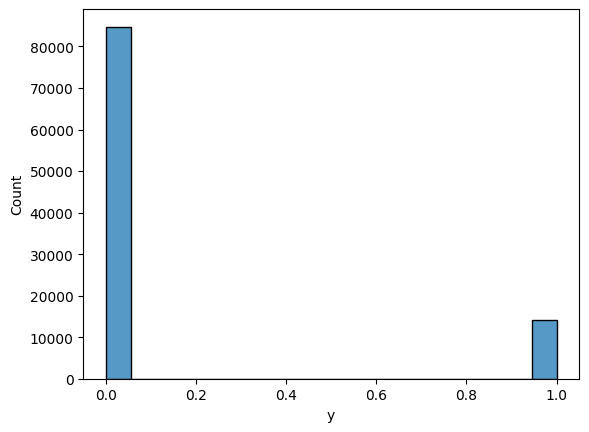

In [46]:
sns.histplot(X_y['y'])

In [63]:
print("Class distribution before ADASYN:", Counter(X_y['y'])[0], Counter(X_y['y'])[1])

Class distribution before ADASYN: 84758 14216


In [64]:
X = X_y.drop(columns=['y'])
y = X_y['y']

In [65]:
adasyn = ADASYN(sampling_strategy='minority', random_state=0)
X, y = adasyn.fit_resample(X, y)

In [66]:
print("Class distribution after ADASYN:", Counter(y)[0], Counter(y)[1])

Class distribution after ADASYN: 84758 84047


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)  ## Разбиваем данные 80/20 и применяем shuffle

In [68]:
X_train

,Поставщик,Материал,Завод,Закупочная организация,Балансовая единица,ЕИ,Вариант поставки,Длительность,Месяц2,Сумма,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30
76675,556,140,2,2,2,2,2,0,4,8.491512,5.0,5.0,5.0
165324,3,4461,1,1,1,1,2,9,8,5.651835,7.0,7.0,7.0
5880,37,1733,1,1,1,2,1,75,11,6.630893,9.0,9.0,9.0
80995,14,21098,1,1,1,1,2,58,9,5.539810,9.0,9.0,9.0
80661,581,9826,2,2,2,1,1,47,10,5.613725,6.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38670,56,9191,6,5,5,1,2,3,1,5.098236,4.0,4.0,4.0
22818,2,27439,1,1,1,1,1,83,12,7.764684,6.0,7.0,7.0
148534,70,9225,1,1,1,1,1,46,8,6.510320,11.0,11.0,11.0
54647,22,3134,8,1,7,1,2,16,4,7.371226,8.0,8.0,8.0


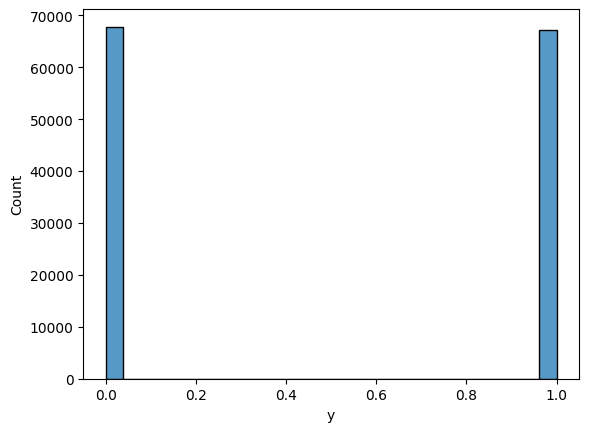

In [69]:
sns.histplot(y_train);

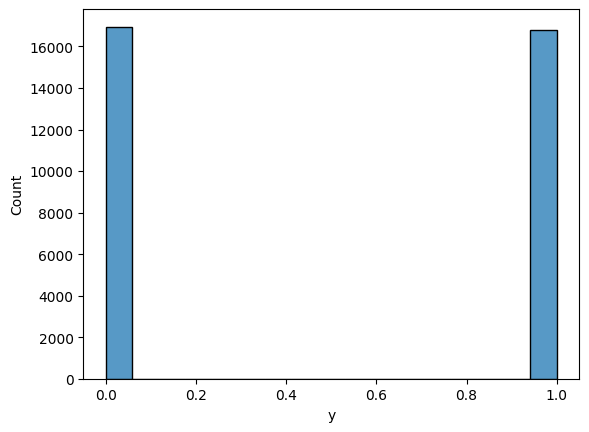

In [70]:
sns.histplot(y_test);

In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[2.04119161e-01, 5.06596691e-03, 1.26582278e-02, ...,
        8.16586890e-02, 8.16586890e-02, 8.16586890e-02],
       [7.35564546e-04, 1.62548291e-01, 0.00000000e+00, ...,
        1.26455826e-01, 1.26455826e-01, 1.26455826e-01],
       [1.32401618e-02, 6.31241344e-02, 0.00000000e+00, ...,
        1.71252963e-01, 1.71252963e-01, 1.71252963e-01],
       ...,
       [2.53769768e-02, 3.36176106e-01, 0.00000000e+00, ...,
        2.16050100e-01, 2.16050100e-01, 2.16050100e-01],
       [7.72342773e-03, 1.14184707e-01, 8.86075949e-02, ...,
        1.48854395e-01, 1.48854395e-01, 1.48854395e-01],
       [1.98602427e-02, 8.40622494e-01, 0.00000000e+00, ...,
        1.48854395e-01, 1.48854395e-01, 1.48854395e-01]])

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[3.67782273e-04, 1.41591953e-01, 0.00000000e+00, ...,
        1.76470588e-01, 1.76470588e-01, 1.76470588e-01],
       [7.28208900e-02, 5.79779867e-01, 0.00000000e+00, ...,
        1.47058824e-01, 1.47058824e-01, 1.47058824e-01],
       [1.12173593e-01, 7.70646549e-01, 2.70270270e-02, ...,
        1.99022435e-01, 1.99022435e-01, 1.99022435e-01],
       ...,
       [5.20044134e-01, 1.00000000e+00, 6.75675676e-02, ...,
        1.17647059e-01, 1.17647059e-01, 1.17647059e-01],
       [5.88451637e-03, 2.93607406e-01, 1.35135135e-01, ...,
        2.54357252e-01, 2.82290641e-01, 2.82290641e-01],
       [1.87936741e-01, 0.00000000e+00, 4.05405405e-02, ...,
        2.05882353e-01, 2.35294118e-01, 2.35294118e-01]])

___
# 4. Начинаем подбирать и обучать модели МО

- ~Метод k-ближайших соседей (K-Nearest Neighbors)~ -- **0.74 (K_neibours=5) (F1-score)**;
- Классификатор дерева решений (Decision Tree Classifier) / Случайный лес (Random Forests);
- Наивный байесовский метод (Naive Bayes);
- Линейный дискриминантный анализ (Linear Discriminant Analysis);
- ~Логистическая регрессия (Logistic Regression)~  -- **0.69 (F1-score)**;
- Глубокое обучение и нейронные сети;

# Логистическая Регрессия (LogisticRegression)

In [77]:
model = LogisticRegression(penalty=None, max_iter=300)  ## Default max_iter=100

In [78]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300, penalty=None)

In [79]:
# Accuracy score
model.score(X_train_scaled, y_train)

0.6480480436006042

In [80]:
recall_score(y_train, model.predict(X_train_scaled))

0.6420327790832565

In [81]:
f1_score(y_train, model.predict(X_train_scaled))

0.6449535733227755

In [82]:
accuracy_score(y_test, model.predict(X_test_scaled))

0.6160066348745594

In [83]:
f1_score(y_test, model.predict(X_test_scaled))

0.6899751291371723

___
# k-ближайших соседей (k-nearest neighbours)

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

In [85]:
knn = knn.fit(X_train_scaled, y_train)

In [86]:
knn.score(X_train_scaled, y_train)

0.8656586001599479

In [87]:
f1_score(y_train, knn.predict(X_train_scaled))

0.8689597388151337

In [88]:
f1_score(y_test, knn.predict(X_test_scaled))

0.7406504486747238

In [89]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20 = knn20.fit(X_train_scaled, y_train)
print("Accuracy: ", knn20.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn20.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn20.predict(X_test_scaled)))

Accuracy:  0.7845146766979652
F1-score(train):  0.7830204154674383
F1-score(test):  0.7395989845085746


In [90]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2 = knn2.fit(X_train_scaled, y_train)
print("Accuracy: ", knn2.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn2.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn2.predict(X_test_scaled)))

Accuracy:  0.930489321998756
F1-score(train):  0.9249610296174907
F1-score(test):  0.6969743323033621


In [91]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1 = knn1.fit(X_train_scaled, y_train)
print("Accuracy: ", knn1.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn1.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn1.predict(X_test_scaled)))

Accuracy:  0.9999037350789373
F1-score(train):  0.9999033291938398
F1-score(test):  0.7240456556168423


___
# Случайный Лес (Random Forest)

In [92]:
RFC = RandomForestClassifier(random_state=0)

In [93]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300,1000],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10,15],    # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,6]       # Minimum number of samples required to be at a leaf node
}

In [94]:
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='f1')

In [95]:
# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [ ]:
# Create a Random Forest Classifier with the best hyperparameters
RFC_best = RandomForestClassifier(random_state=42, **best_params)